#find table that has all player info

In [1]:
# import dependencies
from nba_api.stats.endpoints import commonplayerinfo
import pandas as pd
import json
import pprint as pp
import time

# Testing of API

In [2]:
#testing nba_api to get 1 results.
player_info = commonplayerinfo.CommonPlayerInfo(player_id=1626153)
bron = player_info.get_dict()
bron
player_info.common_player_info.get_data_frame()

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1626153,Delon,Wright,Delon Wright,"Wright, Delon",D. Wright,delon-wright,1992-04-26T00:00:00,Utah,USA,...,delon_wright,2015,2022,Y,Y,Y,2015,1,20,N


# API Pull
## Importing team variables and saving to dataframe

In [3]:
# get team IDs

from nba_api.stats.static import teams

nba_teams = teams.get_teams()
team_df = pd.DataFrame(nba_teams)
# print(team_df)

print(f'teams variables: {list(team_df)}')
print()

team_ids = []
for i in team_df.index:
#     print(team_df.iloc[i]['id'])
    team_ids.append(team_df.iloc[i]['id'])
    
print(team_ids)

teams variables: ['abbreviation', 'city', 'full_name', 'id', 'nickname', 'state', 'year_founded']

[1610612737, 1610612738, 1610612739, 1610612740, 1610612741, 1610612742, 1610612743, 1610612744, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766]


In [4]:
# create df with team id, name, and location
team_df = team_df.loc[:,['id','full_name','city']]
team_df = team_df.rename(columns={'id':'Team ID','full_name':'Team Name','city':'City'})
team_df.head()

,Team ID,Team Name,City
0,1610612737,Atlanta Hawks,Atlanta
1,1610612738,Boston Celtics,Boston
2,1610612739,Cleveland Cavaliers,Cleveland
3,1610612740,New Orleans Pelicans,New Orleans
4,1610612741,Chicago Bulls,Chicago


## Running function to pull player data only for players that played on team id for the 2021-22 season

In [7]:
# get players by team roster for 2021-22
# api library
from nba_api.stats.endpoints import commonteamroster

# initalize lists for constructing dictionary
t_id = []
player_name = []
height = []
weight = []
birthday = []
age = []
school = []
player_id = []
failed_ids = []

# function to request team roster data
def roster_api(id):
    # api call
        data = commonteamroster.CommonTeamRoster(team_id=id,season='2021-22')

        # convert to dictonary format
        data_dict = data.get_dict()

        # store results
        results = data_dict['resultSets'][0]

        # store team roster
        roster = results['rowSet']
        print()

        # iterate through roster to save player info in lists by index number
        for player in roster:

            t_id.append(player[0])
            player_name.append(player[3])
            height.append(player[8])
            weight.append(player[9])
            birthday.append(player[10])
            age.append(player[11])
            school.append(player[13])
            player_id.append(player[14])

        print(f'download for {id} successful')
        print('*****************************')
        print()


# iterate through team ids to download rosters for 2021-22
for id in team_ids:
    print(f'processing data for team id: {id}')
    
    # if first two requests for data fails, store list of failed team_IDs
    try:
        roster_api(id)
    except Exception as e:
        print(e)
    
        try:
            roster_api(id)
        except Exception as e:
            print(e)
            failed_ids.append(id)
            pass
        
print(failed_ids)

processing data for team id: 1610612737

download for 1610612737 successful
*****************************

processing data for team id: 1610612738

download for 1610612738 successful
*****************************

processing data for team id: 1610612739

download for 1610612739 successful
*****************************

processing data for team id: 1610612740

download for 1610612740 successful
*****************************

processing data for team id: 1610612741

download for 1610612741 successful
*****************************

processing data for team id: 1610612742

download for 1610612742 successful
*****************************

processing data for team id: 1610612743

download for 1610612743 successful
*****************************

processing data for team id: 1610612744

download for 1610612744 successful
*****************************

processing data for team id: 1610612745

download for 1610612745 successful
*****************************

processing data for team id: 16106127

In [8]:
# iterate over failed APIs for missing data
for id in failed_ids:
    print(f'processing data for team id: {id}')
    
    # if first two requests for data fails, store list of failed team_IDs
    try:
        roster_api(id)
    except Exception as e:
        print(e)
        try:
            roster_api(id)
        except Exception as e:
            print(e)
            failed_again_ids.append(id)
            pass

processing data for team id: 1610612752

download for 1610612752 successful
*****************************

processing data for team id: 1610612753

download for 1610612753 successful
*****************************

processing data for team id: 1610612754

download for 1610612754 successful
*****************************

processing data for team id: 1610612755

download for 1610612755 successful
*****************************

processing data for team id: 1610612756

download for 1610612756 successful
*****************************

processing data for team id: 1610612757

download for 1610612757 successful
*****************************

processing data for team id: 1610612758

download for 1610612758 successful
*****************************

processing data for team id: 1610612759

download for 1610612759 successful
*****************************

processing data for team id: 1610612760

download for 1610612760 successful
*****************************



In [9]:
# create dictionary
player_dict = {
    'Player ID': player_id,
    'Player Name': player_name,
    'Height': height,
    'Weight': weight,
    'Birthday': birthday,
    'Age': age,
    'School': school,
    'Team ID': t_id
}

# convert dictionary to dataframe
player_df = pd.DataFrame(player_dict)

# show results
player_df

,Player ID,Player Name,Height,Weight,Birthday,Age,School,Team ID
0,1626153,Delon Wright,6-5,185,"APR 26, 1992",30.0,Utah,1610612737
1,1630552,Jalen Johnson,6-8,219,"DEC 18, 2001",20.0,Duke,1610612737
2,1630536,Sharife Cooper,6-1,176,"JUN 11, 2001",21.0,Auburn,1610612737
3,1628989,Kevin Huerter,6-7,198,"AUG 27, 1998",23.0,Maryland,1610612737
4,1630219,Skylar Mays,6-4,205,"SEP 05, 1997",24.0,Louisiana State,1610612737
5,1628995,Kevin Knox II,6-7,215,"AUG 11, 1999",22.0,Kentucky,1610612737
6,101150,Lou Williams,6-2,175,"OCT 27, 1986",35.0,South Gwinnett HS (GA),1610612737
7,1627789,Timothe Luwawu-Cabarrot,6-7,215,"MAY 09, 1995",27.0,,1610612737
8,201568,Danilo Gallinari,6-10,236,"AUG 08, 1988",33.0,Olimpia Milano,1610612737
9,203476,Gorgui Dieng,6-10,248,"JAN 18, 1990",32.0,Louisville,1610612737


## Joining the players for 2021-22 season to their teams

In [10]:
# merge tables
teams_players_df = pd.merge(player_df,team_df,how='left',on='Team ID')
teams_players_df.head()

,Player ID,Player Name,Height,Weight,Birthday,Age,School,Team ID,Team Name,City
0,1626153,Delon Wright,6-5,185,"APR 26, 1992",30.0,Utah,1610612737,Atlanta Hawks,Atlanta
1,1630552,Jalen Johnson,6-8,219,"DEC 18, 2001",20.0,Duke,1610612737,Atlanta Hawks,Atlanta
2,1630536,Sharife Cooper,6-1,176,"JUN 11, 2001",21.0,Auburn,1610612737,Atlanta Hawks,Atlanta
3,1628989,Kevin Huerter,6-7,198,"AUG 27, 1998",23.0,Maryland,1610612737,Atlanta Hawks,Atlanta
4,1630219,Skylar Mays,6-4,205,"SEP 05, 1997",24.0,Louisiana State,1610612737,Atlanta Hawks,Atlanta


## Get the player IDs from the teams_players_df and look up their draft data from the common player info table.

In [11]:
# get existing player id list from player data frame
#turns series into list
player_id = player_df['Player ID'].tolist()

draft_pick = pd.DataFrame()
failed_ids = []
for i in player_id:
    try:
        player_info = commonplayerinfo.CommonPlayerInfo(player_id=i)
        draft_pick = draft_pick.append(player_info.common_player_info.get_data_frame(),ignore_index=True)
    except Exception as e:
        print(e)
        print(i)
        failed_ids.append(i)
    time.sleep(1)

# df of players from the 2021-22 season and their draft data
draft_pick

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1626153,Delon,Wright,Delon Wright,"Wright, Delon",D. Wright,delon-wright,1992-04-26T00:00:00,Utah,USA,...,delon_wright,2015,2022,Y,Y,Y,2015,1,20,N
1,1630552,Jalen,Johnson,Jalen Johnson,"Johnson, Jalen",J. Johnson,jalen-johnson,2001-12-18T00:00:00,Duke,USA,...,jalen_johnson,2021,2022,Y,Y,Y,2021,1,20,N
2,1630536,Sharife,Cooper,Sharife Cooper,"Cooper, Sharife",S. Cooper,sharife-cooper,2001-06-11T00:00:00,Auburn,USA,...,sharife_cooper,2021,2021,Y,Y,Y,2021,2,48,N
3,1628989,Kevin,Huerter,Kevin Huerter,"Huerter, Kevin",K. Huerter,kevin-huerter,1998-08-27T00:00:00,Maryland,USA,...,kevin_huerter,2018,2022,N,Y,Y,2018,1,19,N
4,1630219,Skylar,Mays,Skylar Mays,"Mays, Skylar",S. Mays,skylar-mays,1997-09-05T00:00:00,Louisiana State,USA,...,skylar_mays,2020,2021,Y,Y,Y,2020,2,50,N
5,1628995,Kevin,Knox II,Kevin Knox II,"Knox II, Kevin",K. Knox II,kevin-knox-ii,1999-08-11T00:00:00,Kentucky,USA,...,kevin_knox,2018,2022,N,Y,Y,2018,1,9,N
6,101150,Lou,Williams,Lou Williams,"Williams, Lou",L. Williams,lou-williams,1986-10-27T00:00:00,South Gwinnett HS (GA),USA,...,lou_williams,2005,2021,Y,Y,Y,2005,2,45,N
7,1627789,Timothe,Luwawu-Cabarrot,Timothe Luwawu-Cabarrot,"Luwawu-Cabarrot, Timothe",T. Luwawu-Cabarrot,timothe-luwawu-cabarrot,1995-05-09T00:00:00,,France,...,timothe_luwawu-cabarrot,2016,2021,Y,Y,Y,2016,1,24,N
8,201568,Danilo,Gallinari,Danilo Gallinari,"Gallinari, Danilo",D. Gallinari,danilo-gallinari,1988-08-08T00:00:00,Olimpia Milano,Italy,...,danilo_gallinari,2008,2022,N,Y,Y,2008,1,6,N
9,203476,Gorgui,Dieng,Gorgui Dieng,"Dieng, Gorgui",G. Dieng,gorgui-dieng,1990-01-18T00:00:00,Louisville,Senegal,...,gorgui_dieng,2013,2022,N,Y,Y,2013,1,21,N


In [12]:
# joining the player_df to the draft pick table
draft_players_df = pd.merge(player_df,draft_pick,how='left',left_on='Player ID', right_on = 'PERSON_ID')
#display results
draft_players_df.columns
draft_players_df = draft_players_df.drop(columns = [
'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 
        'GREATEST_75_FLAG', 'PLAYER_SLUG',
       'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION', 'HEIGHT',
       'WEIGHT', 'SEASON_EXP', 'JERSEY', 'POSITION', 'ROSTERSTATUS',
       'GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_CODE',  'PLAYERCODE',
       'FROM_YEAR', 'TO_YEAR', 'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG', 
        'FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST', 'GREATEST_75_FLAG','PERSON_ID'
])
draft_players_df

,Player ID,Player Name,Height,Weight,Birthday,Age,School,Team ID,TEAM_NAME,TEAM_CITY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER
0,1626153,Delon Wright,6-5,185,"APR 26, 1992",30.0,Utah,1610612737,Wizards,Washington,2015,1,20
1,1630552,Jalen Johnson,6-8,219,"DEC 18, 2001",20.0,Duke,1610612737,Hawks,Atlanta,2021,1,20
2,1630536,Sharife Cooper,6-1,176,"JUN 11, 2001",21.0,Auburn,1610612737,Hawks,Atlanta,2021,2,48
3,1628989,Kevin Huerter,6-7,198,"AUG 27, 1998",23.0,Maryland,1610612737,Kings,Sacramento,2018,1,19
4,1630219,Skylar Mays,6-4,205,"SEP 05, 1997",24.0,Louisiana State,1610612737,Hawks,Atlanta,2020,2,50
5,1628995,Kevin Knox II,6-7,215,"AUG 11, 1999",22.0,Kentucky,1610612737,Pistons,Detroit,2018,1,9
6,101150,Lou Williams,6-2,175,"OCT 27, 1986",35.0,South Gwinnett HS (GA),1610612737,Hawks,Atlanta,2005,2,45
7,1627789,Timothe Luwawu-Cabarrot,6-7,215,"MAY 09, 1995",27.0,,1610612737,Hawks,Atlanta,2016,1,24
8,201568,Danilo Gallinari,6-10,236,"AUG 08, 1988",33.0,Olimpia Milano,1610612737,Celtics,Boston,2008,1,6
9,203476,Gorgui Dieng,6-10,248,"JAN 18, 1990",32.0,Louisville,1610612737,Spurs,San Antonio,2013,1,21


In [13]:
# pulling in nba stats table that contains the players PER
nba_stats_df = pd.read_csv('nba_stats_sc_cleaned.csv')
nba_stats_df = nba_stats_df[['Player','Tm','G','PER']]
nba_stats_df

,Player,Tm,G,PER
0,Aaron Gordon,DEN,75,15.3
1,Aaron Henry,PHI,6,-7.4
2,Aaron Holiday,TOT,63,12.6
3,Aaron Holiday,WAS,41,11.3
4,Aaron Holiday,PHO,22,14.9
5,Aaron Nesmith,BOS,52,7.3
6,Aaron Wiggins,OKC,50,10.3
7,Abdel Nader,PHO,14,4.9
8,Ade Murkey,SAC,1,0.0
9,Admiral Schofield,ORL,38,7.5


In [14]:
#Cleaning the nba stats dataframe. It contains duplicate data based on players changing teams in the year.
# TOT in the tm column of the df represents the combined statistics of players for the 2021-22 season
cleaned_per =nba_stats_df.drop_duplicates(subset=['Player'],keep='first')
# cleaned_per

# cleaning the table to only get player name and PER (relevant info from the table)
per_table_join = pd.DataFrame(cleaned_per[['Player','PER', 'G']])

In [15]:
# draft player table contains the player info with draft pick and per table contains player name and per
# limitation of this join is that player id isnt in both and we are relying on names to be correct when joining

player_draft_and_per_df = pd.merge(draft_players_df,per_table_join,how='left',left_on='Player Name', right_on = 'Player')
player_draft_and_per_df

player_draft_and_per_df.loc[(player_draft_and_per_df['DRAFT_ROUND']=='0') | (player_draft_and_per_df['DRAFT_ROUND'].isna())]
player_draft_and_per_df.loc[(player_draft_and_per_df['DRAFT_ROUND']=='0') | (player_draft_and_per_df['DRAFT_ROUND'].isna()), 'DRAFT_NUMBER'] = 'Undrafted'
player_draft_and_per_df.loc[(player_draft_and_per_df['DRAFT_ROUND']=='0') | (player_draft_and_per_df['DRAFT_ROUND'].isna()), 'DRAFT_ROUND'] = 'Undrafted'
# player_draft_and_per_df.loc[(player_draft_and_per_df['DRAFT_ROUND']=='Undrafted')]
# player_draft_and_per_df.groupby(['DRAFT_ROUND']).count()
# player_draft_and_per_df.loc[player_draft_and_per_df['Player ID']==1629312]



In [16]:
# cleaning the final table which has the players draft pick number,per, and player name to do the analysis.
player_draft_and_per_df = player_draft_and_per_df.drop_duplicates(keep='first')
# player_draft_and_per_df = player_draft_and_per_df.drop(columns=['PERSON_ID','Player'])

In [17]:
# player_draft_and_per_df.to_csv('cleaned_player_with_per_and_draft.csv',encoding='utf-8')

In [18]:
avg_per_by_draft_pick = player_draft_and_per_df.groupby(['DRAFT_NUMBER'])['PER'].mean()
avg_per_by_draft_pick = avg_per_by_draft_pick.reset_index()
avg_per_by_draft_pick = avg_per_by_draft_pick.replace({'DRAFT_NUMBER':{'Undrafted':61}})
avg_per_by_draft_pick.dtypes
avg_per_by_draft_pick = avg_per_by_draft_pick.astype({'DRAFT_NUMBER': 'int32'})
avg_per_by_draft_pick = avg_per_by_draft_pick.sort_values(by='DRAFT_NUMBER', ascending=True)
avg_per_by_draft_pick = avg_per_by_draft_pick.replace({'DRAFT_NUMBER':{61:'Undrafted'}})

# count_per_by_draft_pick = player_draft_and_per_df.groupby(['DRAFT_ROUND'])['Player ID'].count()
# count_per_by_draft_pick = count_per_by_draft_pick.reset_index()
# count_per_by_draft_pick = count_per_by_draft_pick.replace({'DRAFT_NUMBER':{'Undrafted':61}})
# count_per_by_draft_pick = count_per_by_draft_pick.astype({'DRAFT_NUMBER': 'int32'})
# count_per_by_draft_pick = count_per_by_draft_pick.sort_values(by='DRAFT_NUMBER', ascending=True)
# count_per_by_draft_pick = count_per_by_draft_pick.replace({'DRAFT_NUMBER':{61:'Undrafted'}})
# count_per_by_draft_pick = count_per_by_draft_pick.reset_index()
# count_per_by_draft_pick

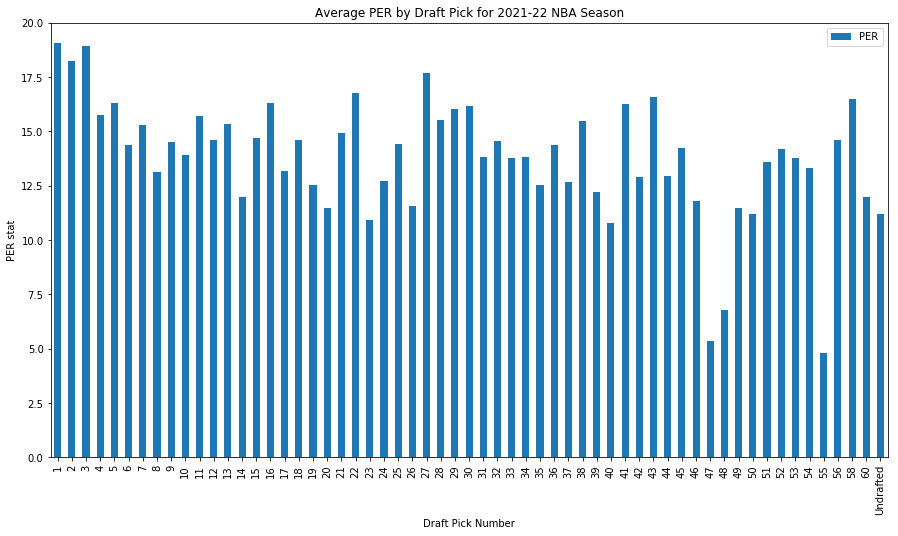

In [21]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

avg_per_by_draft_pick
Per_by_draft_chart = avg_per_by_draft_pick.plot(x='DRAFT_NUMBER',
                                                kind='bar',figsize=(15,8),
    title = 'Average PER by Draft Pick for 2021-22 NBA Season')
Per_by_draft_chart.set_xlabel('Draft Pick Number')
Per_by_draft_chart.set_ylabel('PER stat')

plt.savefig('PER by Draft Pick')
plt.show()

In [22]:
# Statistical Analysis of Round and Draft Pick based on PER
# table to use player_draft_and_per_df

cor_player_draft_pick = player_draft_and_per_df.replace({'DRAFT_ROUND':{'Undrafted':3}})
cor_player_draft_pick = cor_player_draft_pick.replace({'DRAFT_NUMBER':{'Undrafted':61}})

cor_player_draft_pick.loc[cor_player_draft_pick['DRAFT_ROUND']=='Undrafted']

cor_player_draft_pick = cor_player_draft_pick.astype({'DRAFT_ROUND': 'float64'})
cor_player_draft_pick = cor_player_draft_pick.astype({'DRAFT_NUMBER': 'float64'})
cor_player_draft_pick = cor_player_draft_pick[cor_player_draft_pick['PER'].notna()]

#clean data set excluding NA pers and changed the draft number to 61 and draft round to 3 (which are place holders for undrafted)
cor_player_draft_pick.to_csv('cleaned_player_with_per_and_draftV2.csv',encoding='utf-8')
# cor_player_draft_pick.dtypes
# cor_player_draft_pick.groupby(['DRAFT_ROUND'])['PER'].mean()

dround_correlation = round(st.pearsonr(cor_player_draft_pick['PER'],cor_player_draft_pick['DRAFT_ROUND'])[0],2)
dround_correlation
pround_correlation = round(st.pearsonr(cor_player_draft_pick['PER'],cor_player_draft_pick['DRAFT_NUMBER'])[0],2)
pround_correlation
# not a strong correlation, but as draft round pick and draft pick number is lower, the higher per they have.
print(f"The correlation coefficient for draft round is {dround_correlation} and pick number is {pround_correlation}")
print("This leads me to believe there is a very low negative correlation between draft pick and round vs player performance")

The correlation coefficient for draft round is -0.27 and pick number is -0.3
This leads me to believe there is a very low negative correlation between draft pick and round vs player performance


In [23]:
#clean data set excluding NA pers and changed the draft number to 61 and draft round to 3 (which are place holders for undrafted)
cor_player_draft_pick.to_csv('cleaned_player_with_per_and_draftV2.csv',encoding='utf-8')

In [24]:
# table to show stats of draft round and draft pick
per_by_draft = cor_player_draft_pick.groupby(['DRAFT_ROUND'])['PER'].mean()
count_players = cor_player_draft_pick.groupby(['DRAFT_ROUND'])['Player ID'].count()
avg_per_by_draft_round = pd.DataFrame({'Avg PER':per_by_draft,'Count of Players': count_players})
avg_per_by_draft_round

dn_per_by_draft = cor_player_draft_pick.groupby(['DRAFT_NUMBER'])['PER'].mean()
dn_count_players = cor_player_draft_pick.groupby(['DRAFT_NUMBER'])['Player ID'].count()
dn_avg_per_by_draft_round = pd.DataFrame({'Avg PER':dn_per_by_draft,'Count of Players': dn_count_players})
dn_avg_per_by_draft_round

,Avg PER,Count of Players
DRAFT_NUMBER,,
1.0,19.050000,12
2.0,18.233333,9
3.0,18.915385,13
4.0,15.727273,11
5.0,16.309091,11
6.0,14.377778,9
7.0,15.300000,12
8.0,13.136364,11
9.0,14.508333,12


The r-squared is: 0.09256306554569436


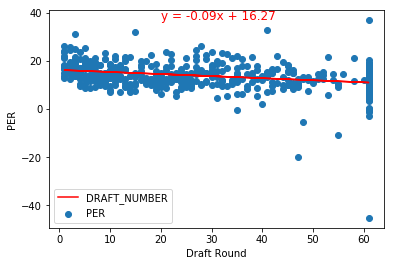

In [25]:
#LINEAR REGRESSION
from scipy.stats import linregress
# store x and y axis values
x_values = cor_player_draft_pick['DRAFT_NUMBER']
y_values = cor_player_draft_pick['PER']
#calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot linear regression on top of scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=12,color="red")
#label and show
plt.xlabel('Draft Round')
plt.ylabel('PER')
print(f"The r-squared is: {rvalue**2}")
plt.legend()
plt.savefig('NBA_linearregression')
plt.show()

In [26]:
draft_name = cor_player_draft_pick['DRAFT_ROUND'].unique()
draft_name = draft_name.tolist()
draft_name

[1.0, 2.0, 3.0]

In [27]:
# box plot
draft_plot = []

for name in draft_name:
    boxplot_values = cor_player_draft_pick.loc[cor_player_draft_pick['DRAFT_ROUND']== name,'PER']
    draft_plot.append(boxplot_values)
    quartiles = boxplot_values.quantile([.25,.5,.75])
    lowerq =quartiles[.25]
    upperq =quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    PER_outliers = boxplot_values.loc[(boxplot_values<lower_bound) | (boxplot_values>upper_bound)]
    print(f"{name} outliers are: {PER_outliers}")

    cor_player_draft_pick[cor_player_draft_pick.index.isin(boxplot_values.index)]

1.0 outliers are: 217    32.1
418    31.2
Name: PER, dtype: float64
2.0 outliers are: 2      -5.4
112    32.8
259   -20.0
354   -10.7
492    -0.4
Name: PER, dtype: float64
3.0 outliers are: 52     36.9
151    -0.5
278     0.4
315    -1.2
363    -3.0
398   -45.2
408     0.2
Name: PER, dtype: float64


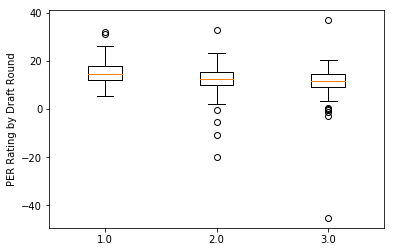

In [28]:
fig1,axl = plt.subplots()
axl.set_ylabel('PER Rating by Draft Round')
axl.boxplot(draft_plot, labels=draft_name)
plt.savefig('NBA_boxplot')
plt.show()

In [29]:
cor_player_draft_pick = cor_player_draft_pick.replace({'DRAFT_YEAR':{'Undrafted':3000}})
cor_player_draft_pick = cor_player_draft_pick.astype({'DRAFT_YEAR': 'int64'})
cor_player_draft_pick.dtypes
# cor_player_draft_pick['G'].mean()

#figuring out who is the veteran (drafted earlier than 2020) MVP
vet_sup = cor_player_draft_pick.loc[(cor_player_draft_pick['DRAFT_YEAR']<2021) & (cor_player_draft_pick['G'] >= cor_player_draft_pick['G'].mean())]
vet_sup = vet_sup[vet_sup['PER']== vet_sup['PER'].max()]['Player Name']
print(f"the veteran superlative goes to {vet_sup}")

#figuring out who is the rookie (drafted in 2021) MVP
rook_sup = cor_player_draft_pick.loc[(cor_player_draft_pick['DRAFT_YEAR']==2021) & (cor_player_draft_pick['G'] >= cor_player_draft_pick['G'].mean())]
rook_sup = rook_sup[rook_sup['PER']== rook_sup['PER'].max()]['Player Name']
print(f"the rookie superlative goes to {rook_sup}")

#figuring out who the undrafted MVP is
undraft_sup = cor_player_draft_pick.loc[(cor_player_draft_pick['DRAFT_YEAR']==3000) & (cor_player_draft_pick['G'] >= cor_player_draft_pick['G'].mean())]
undraft_sup = undraft_sup[undraft_sup['PER']== undraft_sup['PER'].max()]['Player Name']
print(f"the undrafted superlative goes to {undraft_sup}")


the veteran superlative goes to 112    Nikola Jokic
Name: Player Name, dtype: object
the rookie superlative goes to 256    Scottie Barnes
Name: Player Name, dtype: object
the undrafted superlative goes to 152    Christian Wood
Name: Player Name, dtype: object


In [43]:

dr_player_count = cor_player_draft_pick.groupby(['DRAFT_ROUND'])['Player ID'].count()
dr_avg_per = cor_player_draft_pick.groupby(['DRAFT_ROUND'])['PER'].mean()
draft_round_overview = pd.DataFrame({"Players in Draft Round":dr_player_count, "AVG PER in Draft Round":dr_avg_per })

dn_player_count = cor_player_draft_pick.groupby(['DRAFT_NUMBER'])['Player ID'].count()
dn_avg_per = cor_player_draft_pick.groupby(['DRAFT_NUMBER'])['PER'].mean()
draft_number_overview = pd.DataFrame({"Players in Draft Number":dn_player_count, "AVG PER in Draft Number":dn_avg_per })
draft_number_overview
draft_number_overview.sort_values(by = ['AVG PER in Draft Number'] , ascending = False)

,Players in Draft Number,AVG PER in Draft Number
DRAFT_NUMBER,,
1.0,12,19.050000
3.0,13,18.915385
2.0,9,18.233333
27.0,8,17.675000
22.0,6,16.766667
43.0,3,16.600000
58.0,2,16.500000
5.0,11,16.309091
16.0,6,16.300000
